# Checking Password strength using ML agorithms - Project

In [47]:
#loading important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading input data
pwd = pd.read_csv('pwd.csv',engine='python')

In [3]:
pwd.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'], inplace=True)

In [4]:
pwd.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [46]:
pwd[pwd.isnull().any(axis =1)]

,password,strength
367718,NaN,0


In [47]:
pwd.isnull().sum()

password    1
strength    0
dtype: int64

In [ ]:
pwd.dropna(inplace=True)

In [25]:
pwd['strength'].value_counts()

1                             496800
0                              89701
2                              83137
delibeyazim_18@hotmail.com         1
Name: strength, dtype: int64

In [34]:
#Dropping the unnecessary rows
for x,y in enumerate(pwd['password']):
    if y =='selim' or y=='Selim' or y=='SeLiM':
        pwd.drop(x, axis=0,inplace=True)
pwd.drop(610937, inplace=True)

In [16]:
pwd[pwd['password'].isnull()]

,password,strength


In [ ]:
passwords_tuple=np.array(pwd)

In [39]:
#reshuffling the passwords

import random
random.shuffle(passwords_tuple)

In [40]:
passwords_tuple

array([['kzde5577', '1'],
       ['kzde5577', '1'],
       ['visi7k1yr', '1'],
       ...,
       ['bagawaa1982', '1'],
       ['tvclmazy26', '1'],
       ['nitnevuj87', '1']], dtype=object)

### Creating input features and labels

In [41]:
x= [(label[0]) for label in passwords_tuple]

In [62]:
y= [(label[1]) for label in passwords_tuple]

In [50]:
pwd.shape

(669634, 2)

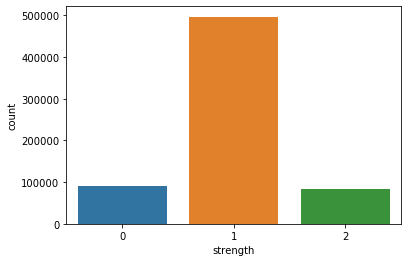

In [49]:
sns.countplot(data=pwd,x='strength')

In [38]:
pwd['strength'].value_counts()

1    496797
0     89701
2     83136
Name: strength, dtype: int64

## Data Preprocessing

In [51]:
#Excracting word based information for every letter in the word
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [96]:
#using TFIDF for creating a maxtrix for word inputs
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)
c=vectorizer.fit_transform(x)

In [55]:
c.shape

(669879, 134)

In [56]:
vectorizer.vocabulary_

{'k': 59,
 'z': 74,
 'd': 52,
 'e': 53,
 '5': 32,
 '7': 34,
 'v': 70,
 'i': 57,
 's': 67,
 '1': 28,
 'y': 73,
 'r': 66,
 'l': 60,
 'a': 49,
 'm': 61,
 'b': 50,
 'o': 63,
 'g': 55,
 'h': 56,
 'n': 62,
 '2': 29,
 '3': 30,
 '8': 35,
 '4': 31,
 'u': 69,
 '6': 33,
 'c': 51,
 'w': 71,
 'q': 65,
 'f': 54,
 't': 68,
 '9': 36,
 '0': 27,
 'j': 58,
 'p': 64,
 '-': 24,
 '@': 42,
 'x': 72,
 '>': 40,
 '.': 25,
 '&': 19,
 '?': 41,
 '<': 38,
 '!': 14,
 '+': 23,
 ';': 37,
 '_': 47,
 '%': 18,
 '(': 20,
 ')': 21,
 ' ': 13,
 '"': 15,
 '~': 78,
 '^': 46,
 '/': 26,
 '$': 17,
 '#': 16,
 '±': 86,
 'ô': 115,
 '\\': 44,
 '*': 22,
 '{': 75,
 '}': 77,
 '`': 48,
 '[': 43,
 ']': 45,
 'þ': 124,
 'ó': 114,
 '=': 39,
 '¿': 97,
 '\x16': 7,
 'ò': 113,
 '·': 92,
 '\x1e': 12,
 'ú': 120,
 '\x19': 9,
 '\x05': 0,
 '\x1b': 10,
 '\x1c': 11,
 '³': 88,
 'ß': 99,
 'à': 100,
 'ä': 103,
 'å': 104,
 '‚': 129,
 '«': 84,
 '´': 89,
 '|': 76,
 'õ': 116,
 '÷': 118,
 'ÿ': 125,
 'ð': 111,
 'â': 102,
 '\x17': 8,
 '\x7f': 79,
 'ý': 123,
 '°'

In [57]:
feature_names=vectorizer.get_feature_names()
#get tfidf vector for first document
first_document_vector=c[0]
#print the scores
df=pd.DataFrame(first_document_vector.T.todense(),index=feature_names,columns=['tfidf'])
df.sort_values(by=['tfidf'], ascending= False)

,tfidf
7,0.590831
5,0.567810
z,0.336570
k,0.291618
d,0.285140
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


# Applying ML algorithms

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(c,y,test_size=0.20,random_state=42)

## Logistic Regression

In [73]:
lr = LogisticRegression(penalty='l2',multi_class='ovr', max_iter=700000)

In [74]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
print(lr.score(x_test,y_test))

0.810630262136502


## Checking with an input password

In [94]:
x_predict = np.array(['@v%$s'])
x_predict=vectorizer.transform(x_predict)
y_predict = lr.predict(x_predict)
print(y_predict)

['2']


## XGboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier=xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(x_train,y_train)

In [ ]:
xgb_classifier.score(x_test,y_test)

## MultinomialNB

In [98]:
from sklearn.naive_bayes import MultinomialNB

In [99]:
nb_classifier = MultinomialNB()

In [ ]:
nb_classifier.fit(x_train,y_train)

In [ ]:
nb_classifier.score(x_test,y_test)